# Project Description
It is required to predict the sale price for a given car through the analysis of data contained in a determined dataset. The research will follow the next steps:
1. Initial Hypothesis.
2. Import the required packages and libraries.
3. Load the required dataset in a DataFrame.
  1. Visualize the DataFrame to be sure that the loading was successful.
    1. First 10 elements.
    2. Last 10 elements.
    3. Length.
    4. Shape.
    5. Main statistic measures.
    6. Data types for each column.
    7. Number of elements for each column.
4. Cleaning and Selection.
  1. Columns removal (editing).
  2. Rows removal (condensation).
    1. Duplicated rows.
    2. Rows with missing data.
5. Data Transformation.
  1. Convert some data to their numeric value.
  2. Convert categorical data to symbolic data.
  3. Grouping or data discretization.
6. Data Mining.
  1. Visual analysis of the data.
7. Prediction model generation.
  1. Generation of the model.
  2. Model measures and visualization.
8. Proving the model.
9. References.

## 1. Initial Hypothesis
It is believed that the engine power (measured as brake horsepower [bhp]) of a car has a direct influence in its selling price. So, the project pretends to demonstrate how true that statement is through the analysis of the correlation between both variables and some other metrics given by the construction of a linear regression model.

During all the process, there may appear some additional data or information that may not have any influence on the desired result, but as much as it is considered relevant, some conclusions will be added to the report.

## 2. Import the required packages and libraries.
The step is extremely recommended because there are a lot of pretty cool packages, modules and libraries that can make all the process so easy. If you decide to not use them, you'll have to write tons of lines of code and at least you have infinite time, you will not be able to do that. Some important concepts to understand are the following:
1. A package is a collection of related modules that work together to provide certain functionality. These modules are contained within a folder and can be imported just like any other modules (Cepalia, 2021). 
2. A module is a Python file that’s intended to be imported into scripts or other modules. It often defines members like classes, functions, and variables intended to be used in other files that import it (Cepalia, 2021).
3. A library is an umbrella term that loosely means “a bundle of code.” These can have tens or even hundreds of individual modules that can provide a wide range of functionality (Cepalia, 2021). 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

## 3. Load the required dataset in a DataFrame.
A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types (pandas, 2021). 

It is important to understand and have clear the concept of DataFrame, because it is the primary pandas data structure, so you need to be familiar with it in order to perform some important actions in and over it.

During the current step, you will understand at a top level how the DataFrame (and the data set) is structured, so you will be able to transform, modify, group and extract some information from it thorugh the next phases.

In [ ]:
df = pd.read_csv('/content/sample_data/Car details v3.csv')


### 3.1. Visualize the DataFrame to be sure that the loading was successful.
If you type the name of a DataFrame as the final statement within a code cell, you will be able to see its basic structure and some data in a table-like representation.

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### 3.1.1. First 10 elements.
The head function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it (pandas, 2021). 

In [ ]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


#### 3.1.2. Last 10 elements.
The tail function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows (pandas, 2021).

In [ ]:
df.tail(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8118,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8119,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
8120,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### 3.1.3. Length.
The size property returns the number of elements in the underlying data (pandas, 2021).

It can be useful if you want to know the length of a Series data structure. Keep in mind that that property counts all the fields within your Series object (even the missing values).

In [ ]:
name = df['name']
year = df['year']
selling_price = df['selling_price']
km_driven = df['km_driven']
fuel = df['fuel']
seller_type = df['seller_type']
transmission = df['transmission']
owner = df['owner']
mileage = df['mileage']
engine = df['engine']
max_power = df['max_power']
torque = df['torque']
seats = df['seats']

print("""
The length of the name column is {}\n
The length of the year column is {}\n
The length of the selling_price column is {}\n
The length of the km_driven column is {}\n
The length of the fuel column is {}\n
The length of the seller_type column is {}\n
The length of the transmission column is {}\n
The length of the owner column is {}\n
The length of the mileage column is {}\n
The length of the engine column is {}\n
The length of the max_power column is {}\n
The length of the torque column is {}\n
The length of the seats column is {}
""".format(name.size, name.size, selling_price.size, km_driven.size, fuel.size,
           seller_type.size, transmission.size, owner.size, mileage.size, 
           engine.size, max_power.size, torque.size, seats.size))


The length of the name column is 8128

The length of the year column is 8128

The length of the selling_price column is 8128

The length of the km_driven column is 8128

The length of the fuel column is 8128

The length of the seller_type column is 8128

The length of the transmission column is 8128

The length of the owner column is 8128

The length of the mileage column is 8128

The length of the engine column is 8128

The length of the max_power column is 8128

The length of the torque column is 8128

The length of the seats column is 8128



#### 3.1.4. Shape.
The shape property is usually used to get the current shape of an array or DataFrame (NumPy, 2021).

The result is a tuple with the number of rows and columns, respectively. That is very useful to know the rectangular dimensions of the DataFrame (if all the data were present, there would be rows x columns total values).

In [ ]:
print(df.shape)

(8128, 13)


#### 3.1.5. Main statistic measures.
The describe method generate descriptive statistics of the given DataFrame. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values. It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided (pandas, 2021).

Maybe the describe() method is one of the most importants, because it lets you see a brief statistical description of the data within your DataFrame, so you can get a very general image of it.



In [ ]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


#### 3.1.6. Data types for each column.
The dtypes property returns a Series with the data type of each column (pandas, 2021).

It is important to be mindful of the data types of each column within your DataFrame because if a significant transformation is needed, you have to be sure of the types you are going to be working with.


In [ ]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

#### 3.1.7. Number of elements for each column.
The count() function returns the count of the non-NA cells for each column or row (pandas, 2019).

The count() function can provide you valuable information about what type of cleaning processes you need. 

In [ ]:
df.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

## 4. Cleaning and Selection.
Once you have seen some of the data in the DataFrame, its shape, its main statistical measures, the data types for each column and the number of elements for each column (and therefore the number of missing values for them), the cleaning and selection process is a lot easier.

### 4.1. Columns removal (editing).
In the section some columns are removed because they do not add any value to the next phases. A column is removed from the DataFrame if and only if:
- Each register contains unique data.
- Its values are useless for the desired analysis.

As it is said before, the applied functions were selected after seeing the data and other important measures. 

**IMPORTANT:** The columns removed can be interesting to analyze in other situations, but for the current project, it was decided to omit them just to focus in other kind of research.

In [ ]:
edited_df = df.drop(['name', 'torque', 'seller_type', 'owner', 'engine', 'seats'], axis=1)
edited_df

,year,selling_price,km_driven,fuel,transmission,mileage,max_power
0,2014,450000,145500,Diesel,Manual,23.4 kmpl,74 bhp
1,2014,370000,120000,Diesel,Manual,21.14 kmpl,103.52 bhp
2,2006,158000,140000,Petrol,Manual,17.7 kmpl,78 bhp
3,2010,225000,127000,Diesel,Manual,23.0 kmpl,90 bhp
4,2007,130000,120000,Petrol,Manual,16.1 kmpl,88.2 bhp
...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,18.5 kmpl,82.85 bhp
8124,2007,135000,119000,Diesel,Manual,16.8 kmpl,110 bhp
8125,2009,382000,120000,Diesel,Manual,19.3 kmpl,73.9 bhp
8126,2013,290000,25000,Diesel,Manual,23.57 kmpl,70 bhp


### 4.2. Rows removal (condensation).
In the current section some rows are discarded because they have some missing value within them. For the particular project, it was decided to remove the elements instead of predicting, replacing with a significant measure, recover or ignore them. That decision was taken because there are few rows with missing values (approximately 3%), so their removal would not affect so much the final results.

**IMPORTANT:** Other interesting option would be to replace the missing values with a significant statistical measure. The fact that there are few rows with the specified characteristics gives us a lot of freedom to choice among the available alternatives.

#### 4.2.1 Duplicated rows.
It is decided to not remove the duplicated rows, because they can represent different objects, but with the same specifications, so it is believed that the remaining data can be important during the model generation or the prediction. 

Remember that the editing process was done before the rows removal, so there may be a lot of duplicated registers that in fact were not the same car. For that reason, in this particular case is not recommended to remove the duplicated rows at this point.

#### 4.2.2. Rows with missing data
On the other hand, the rows with missing information are going to be deleted because there are few, so it is believed that the fact of deleting them is not going to impact very much during the next phases.

In [1]:
condensed_df = edited_df.dropna()
condensed_df.count()

NameError: ignored

In [ ]:
condensed_df

,year,selling_price,km_driven,fuel,transmission,mileage,max_power
0,2014,450000,145500,Diesel,Manual,23.4 kmpl,74 bhp
1,2014,370000,120000,Diesel,Manual,21.14 kmpl,103.52 bhp
2,2006,158000,140000,Petrol,Manual,17.7 kmpl,78 bhp
3,2010,225000,127000,Diesel,Manual,23.0 kmpl,90 bhp
4,2007,130000,120000,Petrol,Manual,16.1 kmpl,88.2 bhp
...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,18.5 kmpl,82.85 bhp
8124,2007,135000,119000,Diesel,Manual,16.8 kmpl,110 bhp
8125,2009,382000,120000,Diesel,Manual,19.3 kmpl,73.9 bhp
8126,2013,290000,25000,Diesel,Manual,23.57 kmpl,70 bhp


## 5. Data Transformation.
Usually, the data are not in a suitable format for their analysis, so there may be some required transformations to be able to take advantage of it as much as you can. Nevertheless, before any action, you need to have clear what your expected results are, so you can look for the best method to achieve them. Precision and meticulousness are crucial aspects during this process. 

The basic approaches to data transformation considered (not all were applicable) for this project were:
- Convert some data to their numeric value (delete their character part).
- Convert categorical data to symbolic data.
- Group or discretize data.

### 5.1 Convert some data to their numeric value.
During this step the values within the mileage and max_power columns are converted to their floating representation. This transformation is very important because if these columns are pretended to be used in a prediction model, their values must be represented as numbers and not as strings.

Once all the values were replaced with their numerical representation, it is required to explicitly change the data type of the column.

In [ ]:
transformed_df = condensed_df[:]

# Replace non numerical values with its numerical representation
# in the columns max_power and mileage.
for i, row in transformed_df.iterrows():
  if len(row['max_power'].split()) != 2:  
    transformed_df.at[i, 'max_power'] = 0
  else:
    power, _ = row['max_power'].split()
    transformed_df.at[i, 'max_power'] = float(power)

  mileage, _ = row['mileage'].split()
  transformed_df.at[i, 'mileage'] = float(mileage)
  
# Once all the values of each column are numeric, it is possible to 
# explicitly change their data type.
transformed_df['mileage'] = pd.to_numeric(transformed_df['mileage'])
transformed_df['max_power'] = pd.to_numeric(transformed_df['max_power'])

print(transformed_df.dtypes)
transformed_df

year               int64
selling_price      int64
km_driven          int64
fuel              object
transmission      object
mileage          float64
max_power        float64
dtype: object


,year,selling_price,km_driven,fuel,transmission,mileage,max_power
0,2014,450000,145500,Diesel,Manual,23.40,74.00
1,2014,370000,120000,Diesel,Manual,21.14,103.52
2,2006,158000,140000,Petrol,Manual,17.70,78.00
3,2010,225000,127000,Diesel,Manual,23.00,90.00
4,2007,130000,120000,Petrol,Manual,16.10,88.20
...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,18.50,82.85
8124,2007,135000,119000,Diesel,Manual,16.80,110.00
8125,2009,382000,120000,Diesel,Manual,19.30,73.90
8126,2013,290000,25000,Diesel,Manual,23.57,70.00


### 5.2 Convert categorical data to symbolic data.
This step is not actually required to prove the initial hypothesis because the engine power is a numeric value. Nevertheless, as it was cleared up before, it is pretended to look for additional information that may not be related with the hypothesis, so the conversion of the fuel and transmission columns from categorical to symbolic data may add value to the research in the next phase.

**INTERESTING FACT:** The commented code represents an approach for deleting the rows that contain an outlier value for the selling_price column. Based on some tests run, it was confirmed that if the outliers values are deleted, the correlation between the diferent categories decreases considerably. For that reason, it was decided to not remove that values.

In [ ]:
categorical_df = pd.get_dummies(transformed_df, columns=['fuel', 'transmission'])
categorical_df

# first_quartil = np.percentile(categorical_df['selling_price'], 25)
# third_quartil = np.percentile(categorical_df['selling_price'], 75)
# for i, row in categorical_df.iterrows():
#   if categorical_df.at[i, 'selling_price'] > third_quartil or categorical_df.at[i, 'selling_price'] < first_quartil:
#     categorical_df.drop(i, inplace=True)




,year,selling_price,km_driven,mileage,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,2014,450000,145500,23.40,74.00,0,1,0,0,0,1
1,2014,370000,120000,21.14,103.52,0,1,0,0,0,1
2,2006,158000,140000,17.70,78.00,0,0,0,1,0,1
3,2010,225000,127000,23.00,90.00,0,1,0,0,0,1
4,2007,130000,120000,16.10,88.20,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,82.85,0,0,0,1,0,1
8124,2007,135000,119000,16.80,110.00,0,1,0,0,0,1
8125,2009,382000,120000,19.30,73.90,0,1,0,0,0,1
8126,2013,290000,25000,23.57,70.00,0,1,0,0,0,1


### 5.3 Grouping or data discretization
It was considered to group the data within the km_driven column, but after seeing its maximum and minimum value calculated before, it was decided to do not do it, because the range is so wide ([1, 2360457]) for creating groups. Usually it is recommended to create **sqrt(n)** intervals, where **n** is the range given by substracting the minimum value of the maximum value. If we calculate that value, we would have almost 1537 different categories. So, once discovered that data, it was determined to not have any grouping or discretization process.


## 6. Data Mining
Data mining is the process of finding anomalies, patterns and correlations within large data sets to predict outcomes. Using a broad range of techniques, you can use this information to increase revenues, cut costs, improve customer relationships, reduce risks and more (SAS Institute Inc., 2021).

The section has the purpose of visualize the data in order to discover new facts that can add value to the current research. It was decided to separate the model generation from data mining, based on the definition provided in the previous paragraph. Thus, the visual analysis of the data is the only subsection in the step.

### 6.1 Visual analysis of the data.
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data (Tableau Software, 2021).



In the following example, it was decided to compare the average selling price of the different cars based on the fuel type they have. Though that data may not contribute to the approval or dismissal of the hypothesis being assessed, it is believed that this can be an interesting fact to consider in other sort of researches.

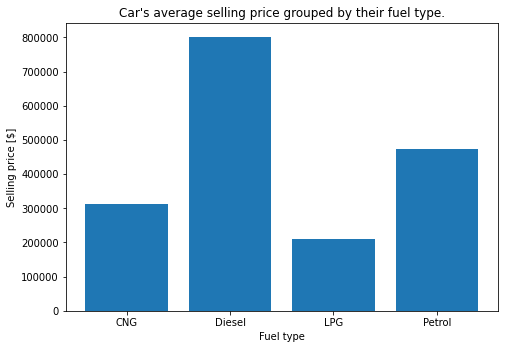

In [ ]:
# Create 2 different lists to store the fuel categories and its respective 
# average selling price.
categories = ["CNG", "Diesel", "LPG", "Petrol"]
average_per_category = []

# Calculate the average selling price for each different fuel type.
average_per_category.append(categorical_df.groupby('fuel_CNG')['selling_price'].mean()[1])
average_per_category.append(categorical_df.groupby('fuel_Diesel')['selling_price'].mean()[1])
average_per_category.append(categorical_df.groupby('fuel_LPG')['selling_price'].mean()[1])
average_per_category.append(categorical_df.groupby('fuel_Petrol')['selling_price'].mean()[1])

# Construct a bar chart to visualize the data.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Car's average selling price grouped by their fuel type.")
ax.set_ylabel("Selling price [$]")
ax.set_xlabel("Fuel type")
ax.bar(categories, average_per_category)
plt.show()

In the following example, it was decided to compare the average selling price of the different cars based on the transmission type they have. Though that data may not contribute to the approval or dismissal of the hypothesis being assessed, it is believed that this can be an interesting fact to consider in other sort of researches.

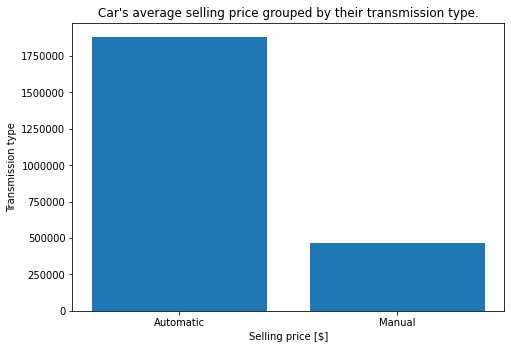

In [ ]:
# Create 2 different lists to store the transmission categories and its respective 
# average selling price.
transmissions = ["Automatic", "Manual"]
average_per_transmission = []

# Calculate the average selling price for each different transmission type.
average_per_transmission.append(categorical_df.groupby('transmission_Automatic')['selling_price'].mean()[1])
average_per_transmission.append(categorical_df.groupby('transmission_Manual')['selling_price'].mean()[1])

# Construct a bar chart to visualize the data.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel("Selling price [$]")
ax.set_xlabel("Transmission type")
ax.bar(transmissions, average_per_transmission)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title ("Car's average selling price grouped by their transmission type.")
plt.show()

The following chart is related with the initial hypothesis. Seeing the correlation between the different data present within the dataset can be very useful while thinking about the prediction models it can be done. In the example, it can be seen that the selling price and the max power has the greater relation among the possible combinations of data. So, until this section, the initial hypothesis cannot be discarded.

Text(0.5, 1.0, 'Correlation of all columns within the data.')

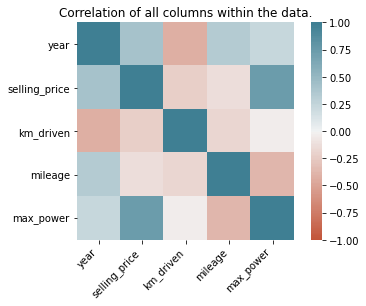

In [ ]:
# Drop the columns that are not needed anymore.
correlation_df = categorical_df.drop(['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'transmission_Automatic', 'transmission_Manual'], axis=1)

# Find the pairwise correlation of all columns in the dataframe.
corr = correlation_df.corr()

# Visualize the correlation of all columns in a friendly way.
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title ("Correlation of all columns within the data.")

The following boxplots are useful to see the values distribution of the 2 data categories that the hypothesis use. 

A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range (Waskorn, 2021).

Though the selling price and the max power are different variables and obviously do not have the same characteristics or metrics, with the help of the boxplots it can be seen that in both exist some similar distribution of the data (especially in the presence of outliers), so a simple prediction model like the linear regression still be very still be suitable. For that reason, the initial hypothesis cannot be discarded yet.

Text(0.5, 1.0, 'Boxplot for selling price values.')

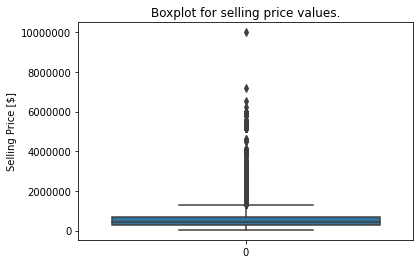

In [ ]:
ax = sns.boxplot(data=correlation_df['selling_price'])
plt.ylabel('Selling Price [$]')
plt.ticklabel_format(style='plain', axis='y')
ax.set_title ("Boxplot for selling price values.")

Text(0.5, 1.0, 'Boxplot for max power values.')

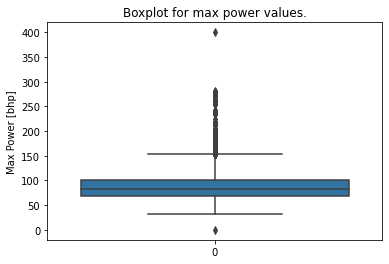

In [ ]:
ax = sns.boxplot(data=correlation_df['max_power'])
plt.ylabel('Max Power [bhp]')
ax.set_title ("Boxplot for max power values.")

Before, adventuring on doing the model, the data was visualized in a scatter plot. This diagram can be helpful during looking for a trend in the relation of the 2 data categories. Additionally, it was calculated the Pearson correlation to add evidence to their linear relationship.

The Pearson Correlation evaluates whether there is statistical evidence for a linear relationship among the same pairs of variables in the population, represented by a population correlation coefficient. Correlation can take on any value in the range [-1, 1]. The sign of the correlation coefficient indicates the direction of the relationship, while the magnitude of the correlation (how close it is to -1 or +1) indicates the strength of the relationship. (Kent State University, 2021).

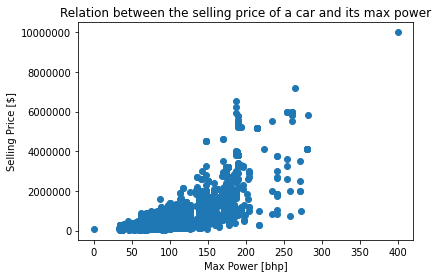

The Pearson correlation of the selling price and the max power is: 0.7495663727543581


In [ ]:
# Create the scatter plot.
plt.scatter(correlation_df['max_power'], correlation_df['selling_price'])
plt.ylabel('Selling Price [$]')
plt.xlabel('Max Power [bhp]')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relation between the selling price of a car and its max power")
plt.show()

# Find the Pearson correlation.
corr, _ = pearsonr(correlation_df['selling_price'], correlation_df['max_power'])
print("The Pearson correlation of the selling price and the max power is: " + str(corr))

## 7. Prediction model generation
Predictive modeling is a process that uses data and statistics to predict outcomes with data models. These models can be used to predict anything from sports outcomes and TV ratings to technological advances and corporate earnings (MicroStrategy Incorporated, 2021).

For the current research, it was pretended to construct a linear regression model. For that reason, in the previous steps there were selected some visual representations that could confirm that the variables being evaluated indeed have an acceptable relation.

### 7.1 Generation of the model
This subsection is focused on the generation of the linear regression model. For the construction, it was used the module from sklearn. 

The module LinearRegression from the SKLearn library fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation (scikit-learn developers, 2020).

In [ ]:
# Convert the Series to numpy arrays in order to be able to use the model
# generator.
max_power = np.asarray(correlation_df[['max_power']])
selling_price = np.asarray(correlation_df[['selling_price']])

# Generate the model with the specified data.
linear_model = LinearRegression()
linear_model.fit(max_power, selling_price)

# Calculate the dependent variable but this time using the recent created model, and not
# the real data.
predicted_selling_price = linear_model.predict(max_power)

### 7.2 Model measures and visualizations

Finally, it was required to see and evaluate the results of the prediction model. It was calculated the coefficient of determination (R^2) and it was created a scatter plot again comparing the selling price and the max power, but this time it was added a line representing results given by the model, so in this way it can be compared the real data against the produced by the model in a visual way. 

The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable, when predicting the outcome of a given event. In other words, this coefficient, which is more commonly known as R-squared (or R2), assesses how strong the linear relationship is between two variables, and is heavily relied on by researchers when conducting trend analysis. A value of 1.0 indicates a perfect fit, and is thus a highly reliable model for future forecasts, while a value of 0.0 would indicate that the calculation fails to accurately model the data at all (Bloomenthal, 2020). 

**What about the initial hypothesis?** Since the coefficient of determination was 0.5618, it can be concluded that 56.18% of the data fits the model. So the result of a prediction will not be bad, but neither it will be very precise. So, the result of this research indicates that the selling price of a car can be pretty well predicted given its max power, but if a more precise approximation is needed, it may be useful to generate a more powerful prediction model than the linear regression.

Coefficient of determination (R^2): 0.561849747164126
Mean squared error: 289963684101.7543


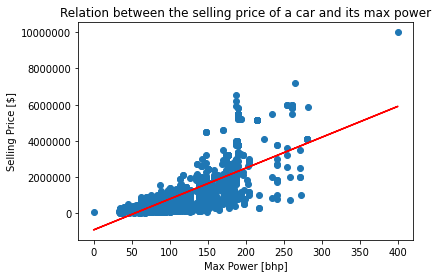

In [ ]:
# Calculate the coefficient of determination (R^2) and the mean squared error.
result = r2_score(selling_price, predicted_selling_price)
print("Coefficient of determination (R^2): " + str(result))
print("Mean squared error: " + str(mean_squared_error(selling_price, predicted_selling_price)))

# Represent the real data and the results of the model visually.
plt.scatter(max_power, selling_price)
plt.plot(max_power, predicted_selling_price, color='red')
plt.xlabel('Max Power [bhp]')
plt.ylabel('Selling Price [$]')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relation between the selling price of a car and its max power")
plt.show()

## 8. Proving the model
The final section only pretends to play a little. Since a prediction model was generated, it can be predicted any selling price of a car you want given its max power. You only need to enter that value and WALLAAAAAH!, you will know the predicted price.

In [ ]:
max_power = int(input())
predicted_price = str(linear_model.predict([[max_power]])[0][0])
print("The predicted selling price for a vehicle of {} bhp is ${}".format(max_power, predicted_price))

100
The predicted selling price for a vehicle of 100 bhp is $793400.3835400103


## 9. References.

- Bloomenthal, A. (2020) *Coefficient of Determination*. Investopedia. https://www.investopedia.com
- Cepalia, A. (2021). *Scripts, Modules, Packages, and Libraries*. Real Python. https://realpython.com
- Kent State University. (2021). *Pearson Correlation*. https://libguides.library.kent.edu
- MicroStrategy Incorporated. (2021). *Predictive Modeling: The Only Guide You'll Need*. Microstrategy. https://www.microstrategy.cn
- NumPy. (2021). *numpy.ndarray.shape*. https://numpy.org
- pandas. (2019). *pandas.DataFrame.count*. https://pandas.pydata.org
- pandas. (2021). *Intro to data structures*. https://pandas.pydata.org
- pandas. (2021). *pandas.DataFrame.describe*. https://pandas.pydata.org
- pandas. (2021). *pandas.DataFrame.dtypes*. https://pandas.pydata.org
- pandas. (2021). *pandas.DataFrame.head*. https://pandas.pydata.org
- pandas. (2021). *pandas.DataFrame.tail*. https://pandas.pydata.org
- pandas. (2021). *pandas.Series.size*. https://pandas.pydata.org
- SAS Institute Inc. (2021). *Data mining. What is it and why it matters*. SAS. https://www.sas.com
- sci-kit developers. (2020). *sklearn.linear_model.LinearRegression*. Scikit Learn. https://scikit-learn.org
- Tableau Software. (2021). *Data visualization beginner's guide: a definition, examples, and learning resources*. Tableau. https://www.tableau.com
- Waskorn, M. (2021). *seaborn.boxplot*. Seaborn. https://seaborn.pydata.org